In [29]:
import numpy as np
import os
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import glob

In [63]:
#Load the COSMOS shape catalog (this is the full catalog, both bright and faint)
#redshift_distribution = np.load("/Users/jw/Documents/cGAN_project_1/rcGAN/cosmos/nz_full.npy", allow_pickle=True)
redshift_distribution = np.load("/Users/jw/Documents/cGAN_project_1/rcGAN/cosmos/hist_n_z.npy", allow_pickle=True)
#TODO: Is .item needed?

In [65]:
redshift_distribution.shape

(550,)

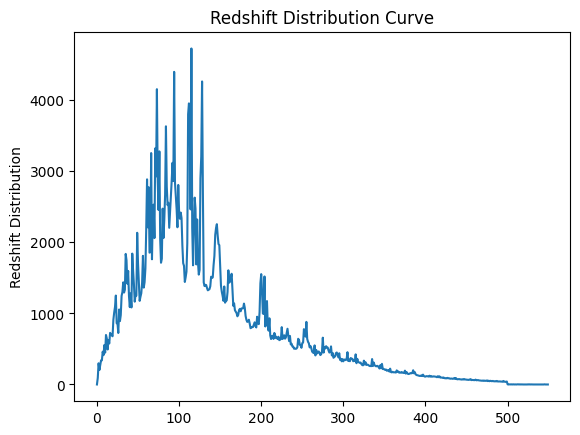

In [66]:
plt.plot(redshift_distribution)
plt.ylabel('Redshift Distribution')
plt.title('Redshift Distribution Curve')
plt.show()

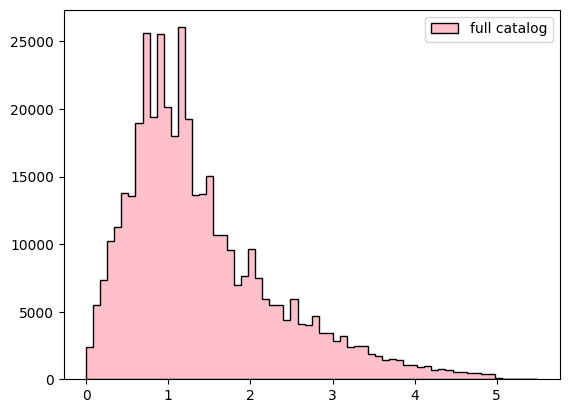

In [67]:
z = np.arange(0, 5.5, .01)
plt.hist(z, weights=redshift_distribution, bins=64, color="pink", alpha=1, ec="k", histtype='stepfilled',
     label='full catalog');
plt.legend()

In [51]:
redshift_vals = [0, 
                 0.034, 0.070, 0.105, 0.142, 0.179,
                 0.216, 0.255, 0.294, 0.335, 0.376,
                 0.418, 0.462, 0.506, 0.552, 0.599,
                 0.648, 0.698, 0.749, 0.803, 0.858,
                 0.914, 0.973, 1.034, 1.097, 1.163,
                 1.231, 1.302, 1.375, 1.452, 1.532,
                 1.615, 1.703, 1.794, 1.889, 1.989,
                 2.094, 2.203, 2.319, 2.440, 2.568]


redshift_vals_array = np.array(redshift_vals)
#TODO: Check the 41st entry is z = 0.

In [14]:
print(len(redshift_vals))

41


K tot = sum over i (omega i kappa i)
omega i = integral (z i - delta z i /2)(z i + delta z i /2)dz n(z) where n(z) = redshift distribution

1. Load source convergence maps from i = 0, 40
2. Calculate omega i
3. Calculate kappa tot

In [15]:
source_dir = "/Users/jw/Documents/LP006/run001/" 
#Eventually want to iterate over source directories
file_prefix = "kappa"
file_extension = ".dat"

# List all files in the folder
files = os.listdir(source_dir)

required_files = [file for file in files if file.startswith(file_prefix) and file.endswith(file_extension)]

In [16]:
print(len(required_files))
print(required_files)


41
['kappa21.dat', 'kappa35.dat', 'kappa09.dat', 'kappa08.dat', 'kappa34.dat', 'kappa20.dat', 'kappa36.dat', 'kappa22.dat', 'kappa23.dat', 'kappa37.dat', 'kappa33.dat', 'kappa27.dat', 'kappa26.dat', 'kappa32.dat', 'kappa18.dat', 'kappa24.dat', 'kappa30.dat', 'kappa31.dat', 'kappa25.dat', 'kappa19.dat', 'kappa40.dat', 'kappa00.dat', 'kappa14.dat', 'kappa28.dat', 'kappa29.dat', 'kappa15.dat', 'kappa01.dat', 'kappa17.dat', 'kappa03.dat', 'kappa02.dat', 'kappa16.dat', 'kappa12.dat', 'kappa06.dat', 'kappa07.dat', 'kappa13.dat', 'kappa39.dat', 'kappa05.dat', 'kappa11.dat', 'kappa10.dat', 'kappa04.dat', 'kappa38.dat']


In [17]:
def get_file_number(file_name):
    return int(file_name[len(file_prefix):-len(file_extension)])

In [18]:
sorted_files = sorted(required_files, key=get_file_number)

In [19]:
print(sorted_files)
print(len(sorted_files))
#The files are now ordered in ascending redshift.

['kappa00.dat', 'kappa01.dat', 'kappa02.dat', 'kappa03.dat', 'kappa04.dat', 'kappa05.dat', 'kappa06.dat', 'kappa07.dat', 'kappa08.dat', 'kappa09.dat', 'kappa10.dat', 'kappa11.dat', 'kappa12.dat', 'kappa13.dat', 'kappa14.dat', 'kappa15.dat', 'kappa16.dat', 'kappa17.dat', 'kappa18.dat', 'kappa19.dat', 'kappa20.dat', 'kappa21.dat', 'kappa22.dat', 'kappa23.dat', 'kappa24.dat', 'kappa25.dat', 'kappa26.dat', 'kappa27.dat', 'kappa28.dat', 'kappa29.dat', 'kappa30.dat', 'kappa31.dat', 'kappa32.dat', 'kappa33.dat', 'kappa34.dat', 'kappa35.dat', 'kappa36.dat', 'kappa37.dat', 'kappa38.dat', 'kappa39.dat', 'kappa40.dat']
41


In [39]:
# #TODO: turn this all into a larger loop to iterate over all runs and LPs.
# ng = 1024 #No. of pixels for kappa.
# kappa_tot = np.zeros((ng, ng))

# for fname in sorted_files:
#     full_path = os.path.join(source_dir, fname)
#     file_paths = glob.glob(full_path)
#     print(fname)
#     print(file_paths)

#     # if not os.path.exists(file_paths):
#     #     print(f'The file at {full_path} does not exist.')
#     with open (file_paths, 'rb') as f:
#         #load  file
#         print(f"loading {fname}...")
#         dummy = np.fromfile(f, dtype="int32", count=1)
#         kappa = np.fromfile(f, dtype="float", count=1024*1024)
#         dummy = np.fromfile(f, dtype="int32", count=1)  

#         kappa = kappa.reshape((1024,1024))
#         #Now the convergence map, for some source redshift has been loaded and configured.

#         #Next step: calculate omega_i redshift[fname] = i-th z value

#         #delta z i / 2
#         x = (redshift_vals[fname + 1] - redshift_vals[fname - 1])/2 #TODO: Is this correct for delta z_i?
#         #(integrand, lower bound, upper bound)
#         #omega = integrate.quad(redshift_distribution, redshift_vals[fname] - x, redshift_vals[fname] + x)
#         omega = np.trapz(redshift_distribution, redshift_vals[fname] - x, redshift_vals[fname] + x)
#         #TODO: check omega is correct form

#         kappa_tot += omega * kappa


        


In [69]:
img_num = 1
for fname in sorted_files:
    full_path = os.path.join(source_dir, fname)

    if not os.path.exists(full_path):
        print(f'The file at {full_path} does not exist.')
    else:
        with open(full_path, 'rb') as f:
            # Load file
            print(f"loading {fname}...")
            dummy = np.fromfile(f, dtype="int32", count=1)
            kappa = np.fromfile(f, dtype="float", count=1024*1024)
            dummy = np.fromfile(f, dtype="int32", count=1)  

            kappa = kappa.reshape((1024, 1024))
            
            # Now you can perform other operations with the loaded data
            x = (redshift_vals_array[img_num + 1] - redshift_vals_array[img_num - 1]) / 2
            print(x)
            #omega = np.trapz(redshift_distribution, redshift_vals_array[img_num] - x, redshift_vals_array[img_num] + x)

            omega = np.trapz(redshift_distribution[redshift_vals_array[img_num] - x:redshift_vals_array[img_num] + x], x=z[redshift_vals_array[img_num] - x:redshift_vals_array[img_num] + x])
            print(f"Integral Value: {omega}")
            
            kappa_tot += omega * kappa
    img_num +=1

loading kappa00.dat...
0.035


TypeError: slice indices must be integers or None or have an __index__ method

In [55]:
redshift_vals_array[1]


0.034